In [180]:
import pandas as pd
from statsmodels.multivariate.pca import PCA
import dcor
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, Legend
from bokeh.palettes import Spectral6, Dark2, inferno
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
from bokeh.models import Range1d
output_notebook()

Loading BokehJS ...

# Load data

In [186]:
df = pd.read_csv('../data/hnlog.csv')
df['vol'] = df['wt']*df['rep']
df = df.fillna(0).set_index(['ex', 'day', 'dt', 'wt', 'rep'])
df = df.multiply(df['vol'], axis='index').drop(columns=['group', 'vol'])

In [187]:
df = df.iloc[:, 12:]
df = df.groupby(['day', 'ex']).sum()

In [111]:
df.query('day==0')

mmetcon   wtlft  bilateral  unilateral    push  pull   chest  \
day ex                                                                          
0   back squat       0.0  6435.0     6435.0         0.0     0.0   0.0     0.0   
    bench press      0.0  3425.0     3425.0         0.0  3425.0   0.0  3425.0   

                 back  shoulder   bi     tri    quad     ham     hip  core  
day ex                                                                      
0   back squat    0.0       0.0  0.0     0.0  6435.0  6435.0  6435.0   0.0  
    bench press   0.0    3425.0  0.0  3425.0     0.0     0.0     0.0   0.0

In [112]:
df.query('day==1')

mmetcon  wtlft  bilateral  unilateral   push  \
day ex                                                                    
1   abmat sit ups              0.0    0.0      300.0         0.0    0.0   
    air squats                 0.0    0.0      400.0         0.0    0.0   
    double unders            500.0    0.0      500.0         0.0    0.0   
    hand release push ups      0.0    0.0      200.0         0.0  200.0   
    pull ups                   0.0    0.0      100.0         0.0    0.0   

                            pull  chest   back  shoulder   bi    tri   quad  \
day ex                                                                        
1   abmat sit ups            0.0    0.0    0.0       0.0  0.0    0.0    0.0   
    air squats               0.0    0.0    0.0       0.0  0.0    0.0  400.0   
    double unders            0.0    0.0    0.0       0.0  0.0    0.0    0.0   
    hand release push ups    0.0  200.0    0.0     200.0  0.0  200.0    0.0   
    pull ups               100.0    0.0  100.0       0.0  0.0    0.0    0.0   

                             ham    hip   core  
day ex                                          
1   abmat sit ups            0.0    0.0  300.0  
    air squats             400.0  400.0    0.0  
    double unders            0.0    0.0    0.0  
    hand release push ups    0.0    0.0    0.0  
    pull ups                 0.0    0.0    0.0

In [113]:
df.query('day==4')

,,mmetcon,wtlft,bilateral,unilateral,push,pull,chest,back,shoulder,bi,tri,quad,ham,hip,core
day,ex,,,,,,,,,,,,,,,
4,run,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Compare pairwise WOD `dCorr` values

In [140]:
cors = []
for i in range(df.index.max()[0]+1):
    for j in range(df.index.max()[0]+1):
        cor = dcor.distance_correlation(
            df.query(f'day=={i}').T, 
            df.query(f'day=={j}').T
        )
    
        cors.append([i, j, cor])

In [177]:
df_corr = pd.DataFrame(cors, columns=['day_A', 'day_B', 'corr'])
df_corr = df_corr.set_index(['day_A', 'day_B']).reset_index()
df_corr.pivot('day_A', 'day_B', 'corr')

day_B,0,1,2,3,4,5,6,7,8,9,10,11,12
day_A,,,,,,,,,,,,,
0,1.000000,0.808740,0.837070,0.0,0.254429,0.763228,0.843874,0.0,0.665565,0.617586,0.570552,0.0,0.733794
1,0.808740,1.000000,0.677038,0.0,0.553768,0.669919,0.664144,0.0,0.735777,0.667027,0.445824,0.0,0.624743
2,0.837070,0.677038,1.000000,0.0,0.297952,0.908588,0.973708,0.0,0.543093,0.700253,0.308931,0.0,0.941898
3,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
4,0.254429,0.553768,0.297952,0.0,1.000000,0.291853,0.279542,0.0,0.222438,0.281492,0.189621,0.0,0.264687
5,0.763228,0.669919,0.908588,0.0,0.291853,1.000000,0.897461,0.0,0.563851,0.714242,0.460764,0.0,0.963413
6,0.843874,0.664144,0.973708,0.0,0.279542,0.897461,1.000000,0.0,0.538643,0.690339,0.404055,0.0,0.919368
7,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
8,0.665565,0.735777,0.543093,0.0,0.222438,0.563851,0.538643,0.0,1.000000,0.513261,0.429175,0.0,0.503927


## Visualizing WOD Similarity

The matrix below shows similarity among pairwise WODs. 1 being identical and 0 being least similar (or rest days). e.g. If we consider the bottom row, and read it from right to left, we see that day 12 has very little in common with day 8,9,10. But it is pretty close to day 5 & 6.

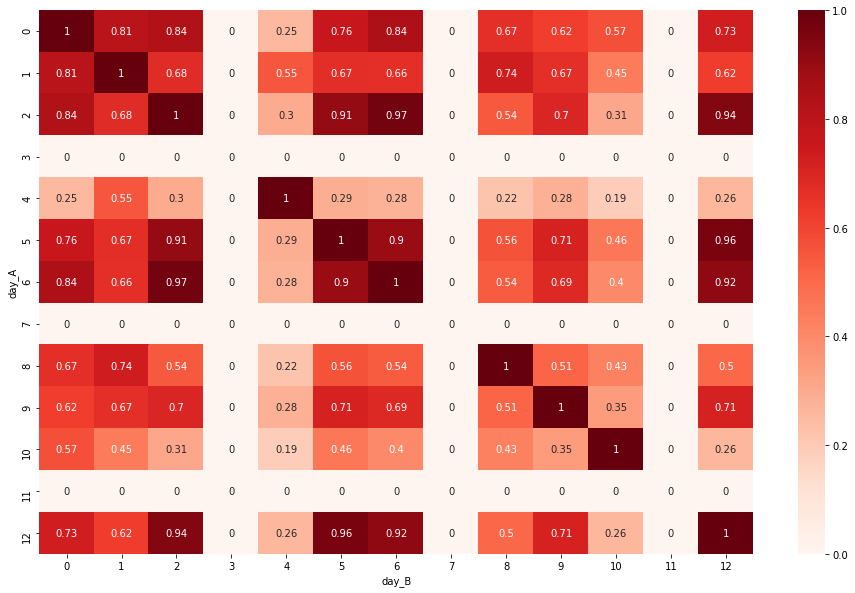

In [185]:
plt.figure(figsize=(16,10))
sns.heatmap(df_corr.pivot('day_A', 'day_B', 'corr'), cmap="Reds", annot=True);